**Models**

**Quarter Back**

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
all_games = pd.read_csv('nfl-football-player-stats/games_1995.csv')
all_games.drop([440917], inplace=True) # delete weird Lagerrete Blount double game
all_games.loc[all_games['team'] == 'SDG', 'team'] = 'LAC'
all_games.loc[all_games['team'] == 'STL', 'team'] = 'LAR'
all_games.loc[all_games['opponent'] == 'SDG', 'opponent'] = 'LAC'
all_games.loc[all_games['opponent'] == 'STL', 'opponent'] = 'LAR'
all_games = all_games.set_index('player_id')
all_players = pd.read_csv('nfl-football-player-stats/players_1995.csv',index_col='player_id')

In [3]:
data = pd.read_csv('qbs_2014_2017.csv', index_col='player_id')
data = data.drop(columns=['ewma_receiving_targets'])
data = data.fillna(0)

In [4]:
# Tuning parameter for RF
# 350 is best
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=3)

#get 2014-2016
features = ['log_draft_position','log_num_games','ewma_fpts','ewma_team_rush_attempts','ewma_team_rush_percentage','ewma_team_passing_rating','ewma_rushing_attempts','DY/P','TO']
resp = ['next_fpts']
trainX2016 = data.loc[data['year'] < 2017][features]
trainy2016 = data.loc[data['year'] < 2017][resp]

# re index
trainX2016.reset_index(drop=True, inplace=True)
trainy2016.reset_index(drop=True, inplace=True)

range_est = [200,250,300,350,400]
mses = [0,0,0,0,0]
maes = [0,0,0,0,0]

for train_index, test_index in kf.split(trainX2016):
    X_train, X_test = trainX2016.iloc[train_index], trainX2016.iloc[test_index]
    y_train, y_test = trainy2016.iloc[train_index], trainy2016.iloc[test_index]
    for j in range(len(range_est)):
        rf_model = RandomForestRegressor(n_estimators=range_est[j])
        rf_model.fit(X_train, y_train)
        preds = rf_model.predict(X_test)
        mses[j] += mean_squared_error(y_test, preds)
        maes[j] += mean_absolute_error(y_test, preds)
print(mses)
print(maes)

/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarnin

[430.13201569460966, 429.164768976226, 427.8787096737382, 426.31911195814587, 424.75878944947954]
[37.15575055762082, 37.14444074349443, 37.06538513011153, 37.01828231545407, 36.97451821561339]


1
Score:  -0.009662060711941534
MAE before feature selection:  6.087880384198847


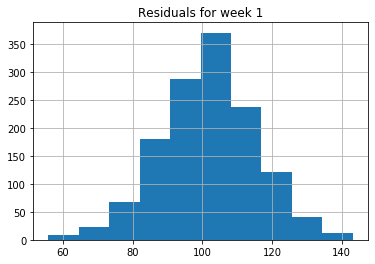

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]
MAE after feature selection:  6.087880384198847
2
Score:  -0.1715120410576365
MAE before feature selection:  9.608470285437694


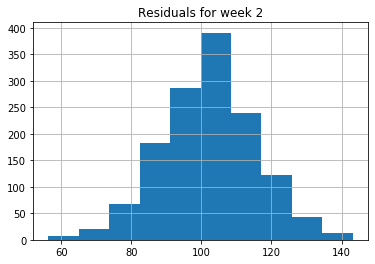

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[False False  True False False False False False False]
[9 5 1 2 3 7 6 4 8]
MAE after feature selection:  9.358123060644468
3
Score:  0.08295201245765871
MAE before feature selection:  7.765143893052526


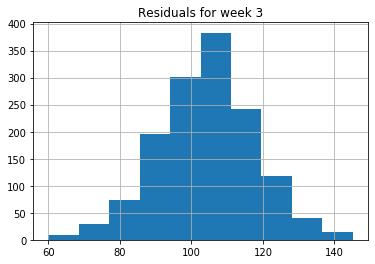

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True  True  True  True  True  True  True  True]
[2 1 1 1 1 1 1 1 1]
MAE after feature selection:  7.779802067221254


/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4
Score:  0.12805915679673474
MAE before feature selection:  7.582211522994353


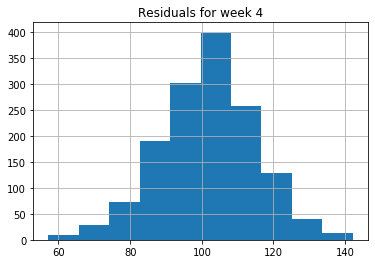

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[False False  True False False False False False False]
[9 6 1 2 3 7 5 4 8]
MAE after feature selection:  7.5349886932229975
5
Score:  0.15561178277585397
MAE before feature selection:  6.583423385126268


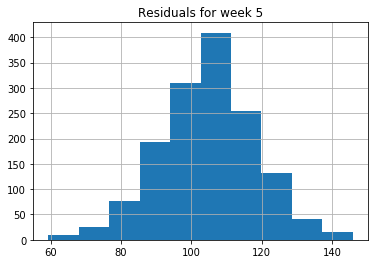

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]
MAE after feature selection:  6.583423385126268
6
Score:  0.11409079056161953
MAE before feature selection:  8.295633908433377


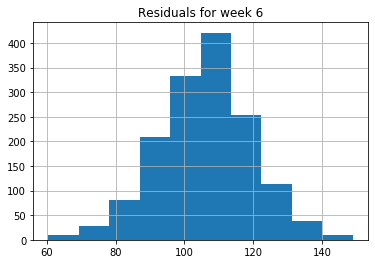

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]
MAE after feature selection:  8.295633908433377
7
Score:  -0.01938960641872378
MAE before feature selection:  5.88649461314418


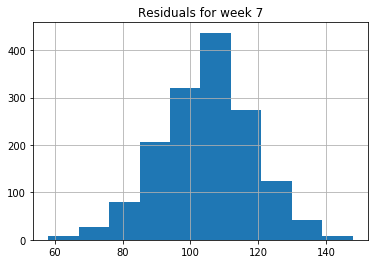

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]
MAE after feature selection:  5.88649461314418
8
Score:  -0.044196592706228444
MAE before feature selection:  4.754244515909968


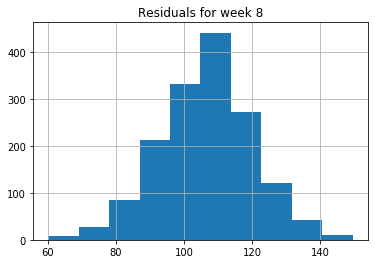

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]
MAE after feature selection:  4.754244515909968
9
Score:  0.10432326048991226
MAE before feature selection:  6.879872643692284


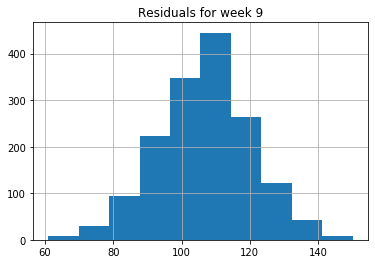

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[False False  True False False False False False False]
[8 9 1 2 3 6 5 4 7]
MAE after feature selection:  6.978468325409434
10
Score:  0.07349988136136287
MAE before feature selection:  7.561012253995443


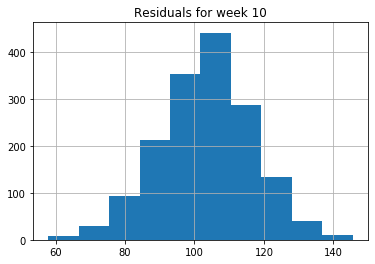

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/s/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]
MAE after feature selection:  7.561012253995443


In [15]:
# Training on the 2017 season
MSEarma = []
MAEarma = []
MSElr = []
MAElr = []
MSErf = []
MAErf = []
MSEbase = []
MAEbase = []

MAElrA = []
MSElrA = []

for w in range(1,11):
    print(w)
    WEEK = w
    POSITION = 'QB'
    YEAR = 2017

    features = ['log_draft_position','log_num_games','ewma_fpts','ewma_team_rush_attempts','ewma_team_rush_percentage','ewma_team_passing_rating','ewma_rushing_attempts','DY/P','TO']
    resp = ['next_fpts']
    X_train = data.loc[data['year'] < 2017][features]
    X_traincurr = data.loc[(data['year'] == 2017) & (data['game_number'] < WEEK)][features]
    if len(X_traincurr)>0:
        X_train = X_train.append(X_traincurr)
    y_train = data.loc[data['year'] < 2017][resp]
    y_traincurr = data.loc[(data['year'] == 2017) & (data['game_number'] < WEEK)][resp]
    if len(y_traincurr)>0:
        y_train = y_train.append(y_traincurr) 
    X_test = data.loc[(data['year'] == 2017) & (data['game_number']==WEEK)][features]
    y_test = data.loc[(data['year'] == 2017) & (data['game_number']==WEEK)][resp]

    # Fitting models

    # naive approach
    preds = data.loc[(data['year'] == 2017) & (data['game_number']==WEEK)]['fpts']
    MAEbase.append(mean_absolute_error(y_test, preds))
    MSEbase.append(mean_squared_error(y_test, preds))

    # ARMA
    '''
    players = get_players_thatweek(all_games, all_players, POSITION, YEAR, WEEK, subset_position)
    X, resp = get_features_response_ARMA(players, all_games, YEAR, WEEK, half_ppr)
    preds = []
    for i in resp.index:
        if type(X.loc[i]['fpts']) != np.float64:
            past_fpts = X.loc[i]['fpts'].values
            model = ARMA(past_fpts, (0,1))
            model_fit = model.fit(disp=0)
            preds.append(model_fit.forecast()[0][0])
        else:
            resp.drop([i],inplace=True)
    MAEarma.append(mean_absolute_error(resp, preds))
    MSEarma.append(mean_squared_error(resp, preds))
    '''

     # linear regression
    XtrainS = StandardScaler().fit_transform(X_train)
    XtestS = StandardScaler().fit_transform(X_test)
    XtrainT = XtrainS.copy()
    XtestT = XtestS.copy()
    lr = LinearRegression()
    lr.fit(XtrainS, y_train)
    print('Score: ',lr.score(XtestS, y_test))
    preds = lr.predict(XtestS)
    MAElr.append(mean_absolute_error(y_test, preds))
    MSElr.append(mean_squared_error(y_test, preds))
    print('MAE before feature selection: ',mean_absolute_error(y_test, preds))
    
    yhat = lr.predict(X_train)
    residuals = yhat - y_train
    plt.figure()
    plt.hist(residuals.values)
    plt.title('Residuals for week '+str(w))
    plt.grid()
    plt.show()
    
    
    selector = RFECV(lr, step=1, cv=10)
    selector = selector.fit(XtrainT, y_train)
    print(selector.support_)
    print(selector.ranking_)
    X_new = selector.transform(XtrainT)
    lr.fit(X_new,y_train)
    preds = lr.predict(selector.transform(XtestT))
    print('MAE after feature selection: ',mean_absolute_error(y_test, preds))
    MAElrA.append(mean_absolute_error(y_test, preds))
    MSElrA.append(mean_squared_error(y_test, preds))

    # random forest
    rf = RandomForestRegressor(n_estimators = 350)
    rf.fit(XtrainS, y_train)
    preds = rf.predict(XtestS)
    MAErf.append(mean_absolute_error(y_test, preds))
    MSErf.append(mean_squared_error(y_test, preds))

In [6]:
# lr.score(XtestS, y_test)

0.07349988136136287

In [16]:
print("RF: ",MAErf)
print("RF: ", MSErf)
print("LR: ",MAElr)
print("LR: ", MSElr)
print("LRAdjusted: ",MAElrA)
print("LRAdjusted: ", MSElrA)
print("baseline: ",MAEbase)
print("baseline: ", MSEbase)
print("ARMA: ",MAEarma)
print('ARMA: ', MSEarma)

RF:  [6.683223645320203, 9.798658928571424, 7.661557603686635, 8.019540952380941, 6.9947204081632615, 8.499432380952378, 6.546374603174604, 5.1345198156682015, 7.190828571428577, 7.235878341013822]
RF:  [65.80918805078122, 134.75158958683667, 96.952899436682, 95.07572715526511, 77.86315060396502, 117.56491446704747, 67.33048491658357, 46.40842225074386, 79.917902333279, 72.78938117877549]
LR:  [6.087880384198847, 9.608470285437694, 7.765143893052526, 7.582211522994353, 6.583423385126268, 8.295633908433377, 5.88649461314418, 4.754244515909968, 6.879872643692284, 7.561012253995443]
LR:  [54.3366303999155, 126.01249143890068, 92.02480021611306, 87.53372465521738, 71.29313780992773, 108.65506201698555, 58.111011234759545, 42.82375095650193, 73.54219427948877, 77.60635404490665]
LRAdjusted:  [6.087880384198847, 9.358123060644468, 7.779802067221254, 7.5349886932229975, 6.583423385126268, 8.295633908433377, 5.88649461314418, 4.754244515909968, 6.978468325409434, 7.561012253995443]
LRAdjusted:

Plot

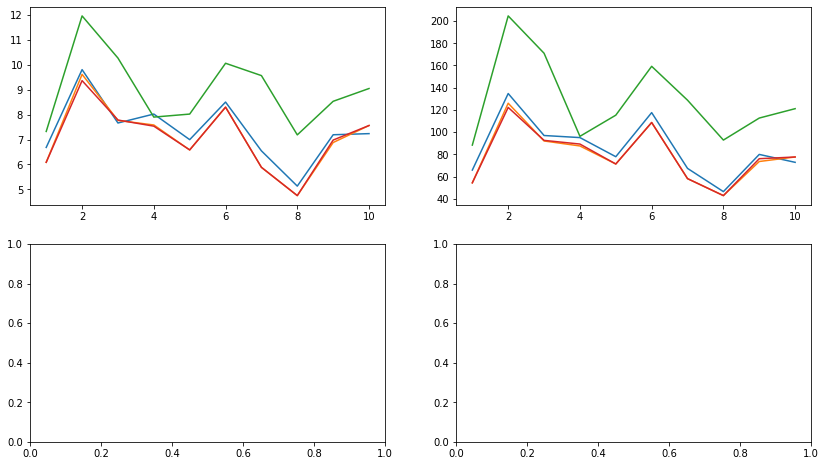

In [17]:
fig, axs = plt.subplots(2,2, figsize=(14,8))
weeks = range(1,11)
axs[0,0].plot(weeks, MAErf)
axs[0,0].plot(weeks, MAElr)
axs[0,0].plot(weeks, MAEbase)
# no need to include unless you're curious:
# axs[0,0].plot(weeks, MAElrA)
axs[0,1].plot(weeks, MSErf)
axs[0,1].plot(weeks, MSElr)
axs[0,1].plot(weeks, MSEbase)
# no need to include unless you're curious:
# axs[0,1].plot(weeks, MSElrA)

Helpful Functions

In [9]:
def get_players_thatweek(all_games, all_players, position, year, game_number, subset_position, specific_players=None):
    if specific_players != None:
        ids = specific_players
    else:
        ids = all_players[all_players.position == position].index
        
    # return pandas df with player_id as index and player name and log draft position columns
    games = all_games.loc[ids]
    stats = subset_position[position][0]
    sum_threshold = subset_position[position][1]
    # only take RBs with 5 rush attempts or receiving targets (>= sum_threshold)
    worth_predicting = games[(games.year == year) & 
                             (games.game_number == game_number) &
                             (np.sum(games[stats], axis=1) >= sum_threshold)]
    ids = worth_predicting.index
    for_df = all_players.loc[ids, ['name', 'draft_position']]
    # players that weren't drafted give them position of last pick of draft
    for_df.fillna(255, inplace=True)
    for_df['log_draft_position'] = np.log(for_df.draft_position)
    return pd.DataFrame(data=for_df)

In [10]:
half_ppr = {
    'rushing_yards': 0.1,
    'rushing_touchdowns': 6,
    'receiving_receptions': 0.5,
    'receiving_yards': 0.1,
    'receiving_touchdowns': 6
}

In [11]:
# subset RB position by choosing only RBs with at least 3 fantasy points in previous game
subset_position = {
    'RB': [['rushing_attempts', 'receiving_targets'], 5.0],
    'WR': [['rushing_attempts', 'receiving_targets'], 5.0],
    'QB': [['passing_attempts'], 10.0]
}

In [12]:
def get_features_response_ARMA(players, all_games, year, gameNumber, points_dict):
    games = all_games.loc[players.index]
    
    # compute fpts for each row
    games['fpts'] = games['game_number']*0
    for stat, value in zip(points_dict.keys(), points_dict.values()):
        games['fpts'] = games['fpts'] + games[stat]*value

    prev_years = games[(games.year < year) &
                       (games.game_number <= 16)]
    current_year = games[(games.year == year) &
                         (games.game_number <= gameNumber)]
    next_game = games[(games.year == year) &
                     (games.game_number == gameNumber+1)]
    
    df = pd.concat((prev_years, current_year))
    df.sort_values(by=['player_id', 'year', 'game_number'], axis=0,
                   ascending=False, inplace=True)
    # group dataframe by index
    df = df.groupby(df.index)
    
    past_16 = df.nth(list(range(0,16))).fpts
    weeks = df.nth(list(range(0,16))).game_number
    years = df.nth(list(range(0,16))).year
    
    # get response variable, the next game fantasy points 
    resp = next_game['fpts']

    for_return = pd.concat([past_16, years, weeks], axis=1)
    for_return.sort_values(by=['player_id', 'year', 'game_number'], axis=0, ascending=False, inplace=True)
    resp = resp.sort_index(ascending=False)
    return for_return, resp